Numerical Differentiation
========================
Numeric differentiation is a technique used to approximate the derivative of a function when an analytical derivative is difficult or impossible to obtain. It is widely used to analyze rates of change in discrete data sets or complex functions. The most common methods include finite difference approximations, such as **forward**, **backward**, and **central** differences, which estimate derivatives using function values at nearby points. While numerical differentiation is straightforward to implement, it can introduce errors due to finite precision and step size selection, requiring careful consideration of accuracy and stability.

## Forward/Backward Difference 

The forward/backward difference uses the traditional equation for differentiation:

$$\frac{dy}{dx} = y'(x) =  \frac{y(x+\Delta x) - y(x)}{h}$$

where $h$ is the **step size**, also denoted as $dx\approx\Delta x$ in some text.

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0 = h$

$dy \approx \Delta y =y_1-y_0= y(x_1)-y(x_0) = y(x_0+\Delta x)-y(x_0)$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{h}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [1]:
dx = 1.
x = 1.
ans = 2.
step = []
er = []
while(dx > 1.e-16):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    step.append(dx)
    er.append(d-ans)
    print("%6.0e %20.16f %20.16f" % (dx, d, d-ans))
    dx = dx / 10.
    

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000019   0.1000000000000019
 1e-02   2.0100000000000007   0.0100000000000007
 1e-03   2.0009999999996975   0.0009999999996975
 1e-04   2.0000999999991720   0.0000999999991720
 1e-05   2.0000100000139298   0.0000100000139298
 1e-06   2.0000009999243669   0.0000009999243669
 1e-07   2.0000001010878061   0.0000001010878061
 1e-08   1.9999999878450576  -0.0000000121549424
 1e-09   2.0000001654807416   0.0000001654807416
 1e-10   2.0000001654807416   0.0000001654807416
 1e-11   2.0000001654807416   0.0000001654807416
 1e-12   2.0001778011646816   0.0001778011646816
 1e-13   1.9984014443252816  -0.0015985556747184
 1e-14   1.9984014443252816  -0.0015985556747184
 1e-15   2.2204460492503131   0.2204460492503131
 1e-16   0.0000000000000000  -2.0000000000000000


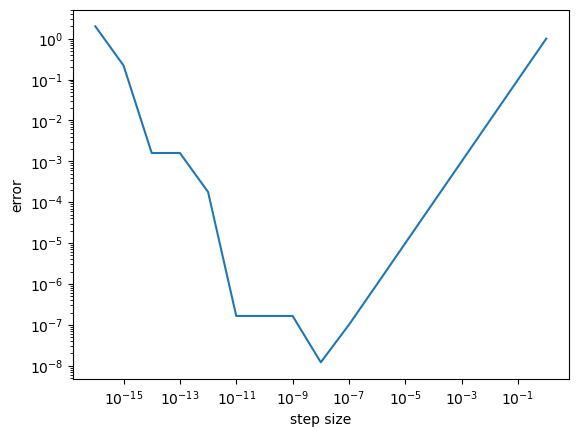

In [2]:
import matplotlib.pyplot as plt
# need absolute values for log plot
ers = [abs(x) for x in er ]
plt.loglog(step,ers)
plt.xlabel('step size')
plt.ylabel('error')
plt.show()

Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [3]:
((1.+0.0001)*(1+0.0001)-1)

0.0002000099999999172

Let's try using powers of 1/2

In [4]:
dx = 1.
x = 1.
step2 = []
er2 = []
while(dx > 1.e-16):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    step2.append(dx)
    er2.append(d-2)
    print("%8.5e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 2.

1.00000e+00   3.0000000000000000   1.0000000000000000
5.00000e-01   2.5000000000000000   0.5000000000000000
2.50000e-01   2.2500000000000000   0.2500000000000000
1.25000e-01   2.1250000000000000   0.1250000000000000
6.25000e-02   2.0625000000000000   0.0625000000000000
3.12500e-02   2.0312500000000000   0.0312500000000000
1.56250e-02   2.0156250000000000   0.0156250000000000
7.81250e-03   2.0078125000000000   0.0078125000000000
3.90625e-03   2.0039062500000000   0.0039062500000000
1.95312e-03   2.0019531250000000   0.0019531250000000
9.76562e-04   2.0009765625000000   0.0009765625000000
4.88281e-04   2.0004882812500000   0.0004882812500000
2.44141e-04   2.0002441406250000   0.0002441406250000
1.22070e-04   2.0001220703125000   0.0001220703125000
6.10352e-05   2.0000610351562500   0.0000610351562500
3.05176e-05   2.0000305175781250   0.0000305175781250
1.52588e-05   2.0000152587890625   0.0000152587890625
7.62939e-06   2.0000076293945312   0.0000076293945312
3.81470e-06   2.000003814697

Text(0, 0.5, 'error')

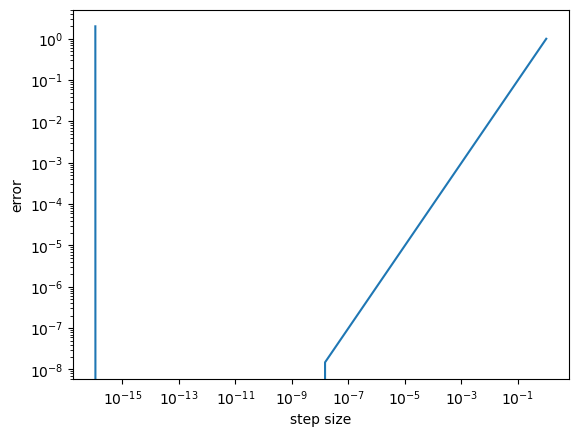

In [5]:
# need absolute values for log plot
ers2 = [abs(x) for x in er2 ]
plt.loglog(step2,ers2)
plt.xlabel('step size')
plt.ylabel('error')

That appeared to have less trouble as the step size got smaller. Why is that? To answer, consider the output from:

In [6]:
print(f"{0.1:.60f}")  # Shows it's not exactly 0.1
print(f"{0.5:.60f}")  # Shows it IS exactly 0.5

0.100000000000000005551115123125782702118158340454101562500000
0.500000000000000000000000000000000000000000000000000000000000


## Central (Midpoint) Difference

The central difference method is a more accurate numerical differentiation technique compared to forward or backward differences because it utilizes points on both sides of the target point to estimate the derivative. It is given by the formula:
$$ \frac{dy}{dx} \approx \frac{y(x_0+\frac{h}{2})-y(x_0-\frac{h}{2})}{h}.$$
By averaging symmetric function values around $x$, the central difference method reduces truncation error to the order of $\mathcal{O}(h^2)$


For a more complex function we may need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and central differences.

In [7]:
from math import sin, sqrt, pi
dx = 1.
data = []
while(dx > 1.e-16):
    x = pi/4.
    d1 = sin(x+dx) - sin(x); #forward
    d2 = sin(x+dx*0.5) - sin(x-dx*0.5); # midpoint
    d1 = d1 / dx;
    d2 = d2 / dx;
    e1 = d1-sqrt(2.)/2.
    e2 = d2-sqrt(2.)/2.
    print("%8.5e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, e1, d2, e2) )
    data.append([dx,d1,e1,d2,e2])
    dx = dx / 2.

1.00000e+00   0.2699544827129281  -0.4371522984736195   0.6780100988420897  -0.0290966823444578
5.00000e-01   0.5048856975964857  -0.2022210835900619   0.6997640691250939  -0.0073427120614536
2.50000e-01   0.6118351194488105  -0.0952716617377370   0.7052667953545546  -0.0018399858319930
1.25000e-01   0.6611301360648305  -0.0459766451217171   0.7066465151141275  -0.0004602660724201
6.25000e-02   0.6845566203276618  -0.0225501608588857   0.7069916978116630  -0.0001150833748845
3.12500e-02   0.6959440534591224  -0.0111627277274252   0.7070780092891873  -0.0000287718973603
1.56250e-02   0.7015538499518428  -0.0055529312347048   0.7070995881463560  -0.0000071930401916
7.81250e-03   0.7043374663312534  -0.0027693148552942   0.7071049829223881  -0.0000017982641595
3.90625e-03   0.7057239167464786  -0.0013828644400690   0.7071063316202526  -0.0000004495662950
1.95312e-03   0.7064157978737171  -0.0006909833128305   0.7071066687949497  -0.0000001123915979
9.76562e-04   0.7067614018393442  -0.000

In [8]:
import numpy as np
arraydata = np.array(data)
arraydata[:,0]

array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
       2.44140625e-04, 1.22070312e-04, 6.10351562e-05, 3.05175781e-05,
       1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
       9.53674316e-07, 4.76837158e-07, 2.38418579e-07, 1.19209290e-07,
       5.96046448e-08, 2.98023224e-08, 1.49011612e-08, 7.45058060e-09,
       3.72529030e-09, 1.86264515e-09, 9.31322575e-10, 4.65661287e-10,
       2.32830644e-10, 1.16415322e-10, 5.82076609e-11, 2.91038305e-11,
       1.45519152e-11, 7.27595761e-12, 3.63797881e-12, 1.81898940e-12,
       9.09494702e-13, 4.54747351e-13, 2.27373675e-13, 1.13686838e-13,
       5.68434189e-14, 2.84217094e-14, 1.42108547e-14, 7.10542736e-15,
       3.55271368e-15, 1.77635684e-15, 8.88178420e-16, 4.44089210e-16,
       2.22044605e-16, 1.11022302e-16])

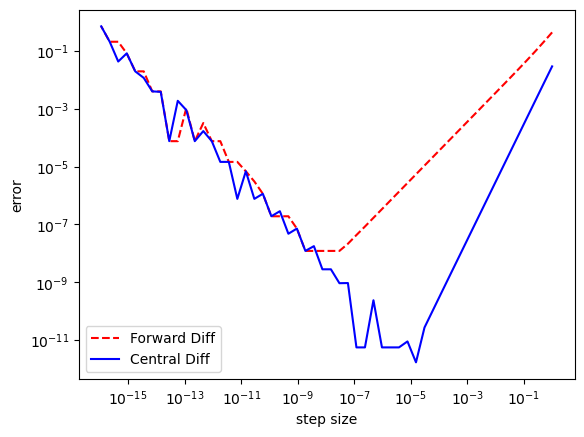

In [9]:
import matplotlib.pyplot as plt
plt.loglog(arraydata[:,0],abs(arraydata[:,2]),'r--',label= 'Forward Diff' )
plt.loglog(arraydata[:,0],abs(arraydata[:,4]),'b', label='Central Diff')
plt.xlabel('step size')
plt.ylabel('error')
plt.legend()

What do you notice? Which one does "better"? What does *better* mean?

## Understanding the Error Behavior

Notice something strange in the plot above? The error **decreases** as we make the step size smaller, but then it suddenly starts **increasing** again when the step size gets very small! Why?

There are actually **two sources of error** competing with each other:

### 1. Truncation Error (Mathematical Approximation)
This comes from the fact that our finite difference formula is an *approximation* to the true derivative. The Taylor series expansion shows:
$$f(x+h) = f(x) + f'(x)h + \frac{1}{2}f''(x)h^2 + \mathcal{O}(h^3)$$

For forward difference:
$$\frac{f(x+h)-f(x)}{h} = f'(x) + \frac{1}{2}f''(x)h + \mathcal{O}(h^2)$$

The truncation error is proportional to **h** (for forward/backward) or **h²** (for central difference).
- Behavior: Gets *smaller* as h decreases
- This is why we expect better accuracy with smaller step sizes

### 2. Roundoff Error (Computer Arithmetic)
Computers can only store numbers to finite precision (about 16 decimal digits for standard floats). When we compute $f(x+h) - f(x)$ for very small h, both numbers are nearly identical, and we lose significant digits in the subtraction. This is called **catastrophic cancellation**.

- Behavior: Gets *larger* as $h$ decreases (we're subtracting nearly equal numbers)
- This is why the error explodes when $h$ becomes too small

### The Optimal Step Size
The best accuracy occurs where these two errors balance each other. For double precision arithmetic:
- Forward/backward difference: optimal $h\approx \sqrt{\varepsilon}\approx 10^{-8}$
- Central difference: optimal $h\approx \sqrt[3]{\varepsilon}\approx 10^{-5}$

Let's visualize both error sources together:

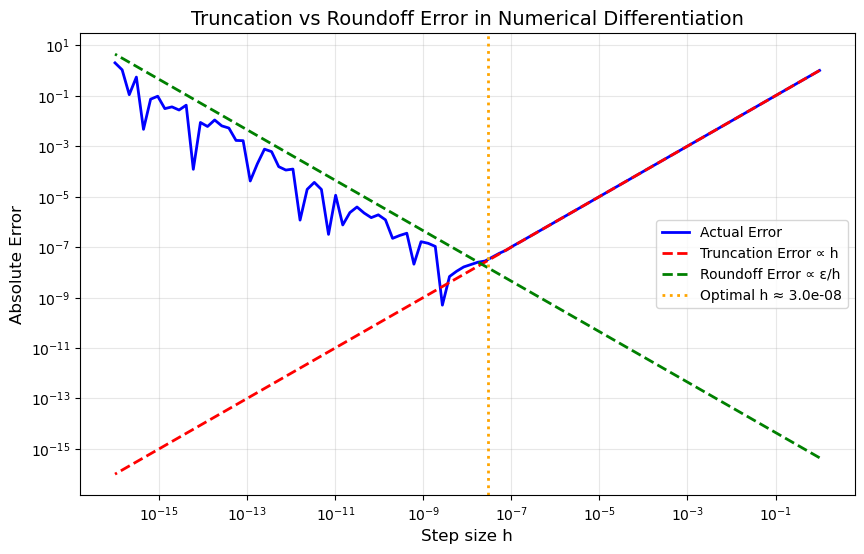

Machine epsilon: 2.22e-16
Optimal step size estimate: 2.98e-08


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate derivative of x^2 at x=1 (true answer = 2)
x = 1.0
step_sizes = np.logspace(0, -16, 100)  # h from 1 to 10^-16
forward_errors = []
truncation_est = []
roundoff_est = []

for h in step_sizes:
    # Forward difference
    dy = (x+h)*(x+h) - x*x
    derivative_approx = dy / h
    error = abs(derivative_approx - 2.0)
    forward_errors.append(error)
    
    # Estimate truncation error: proportional to h
    # For f(x)=x^2, f''(x)=2, so truncation error ≈ h
    truncation_est.append(h)
    
    # Estimate roundoff error: proportional to ε/h
    # where ε ≈ 10^-16 is machine epsilon
    machine_eps = np.finfo(float).eps
    roundoff_est.append(2 * machine_eps / h)  # factor of 2 from the subtraction

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, forward_errors, 'b-', linewidth=2, label='Actual Error')
plt.loglog(step_sizes, truncation_est, 'r--', linewidth=2, label='Truncation Error ∝ h')
plt.loglog(step_sizes, roundoff_est, 'g--', linewidth=2, label='Roundoff Error ∝ ε/h')

# Mark the optimal step size
optimal_h = np.sqrt(machine_eps) * 2  # rough estimate
plt.axvline(optimal_h, color='orange', linestyle=':', linewidth=2, label=f'Optimal h ≈ {optimal_h:.1e}')

plt.xlabel('Step size h', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Truncation vs Roundoff Error in Numerical Differentiation', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Machine epsilon: {machine_eps:.2e}")
print(f"Optimal step size estimate: {optimal_h:.2e}")

## Special functions in **numpy**

NumPy provides built-in functions for numerical differentiation that are convenient when working with array data:

- **`np.diff()`**: Calculates forward differences between consecutive elements
- **`np.gradient()`**: Calculates derivatives using central differences (more accurate)

Let's understand how each works:

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Simple example: derivative of x^2
x = np.array([0, 1, 2, 3, 4, 5])
y = x**2  # y = [0, 1, 4, 9, 16, 25]

print("x values:", x)
print("y values:", y)
print()

# np.diff() computes forward differences: y[i+1] - y[i]
dy = np.diff(y)
print("np.diff(y):", dy)
print("Note: output has one fewer element than input!")

x values: [0 1 2 3 4 5]
y values: [ 0  1  4  9 16 25]

np.diff(y): [1 3 5 7 9]
Note: output has one fewer element than input!


**Important**: `np.diff()` returns an array with **one fewer element** than the input because it computes differences *between* consecutive points. To get a derivative, we also need to divide by the step size:


In [12]:
dx = np.diff(x)
derivative_forward = dy / dx
print("Derivative using np.diff():", derivative_forward)
print("True derivative at those points:", 2*x[:-1])  # d(x^2)/dx = 2x, evaluated at x[0] through x[4]

Derivative using np.diff(): [1. 3. 5. 7. 9.]
True derivative at those points: [0 2 4 6 8]


Now let's look at `np.gradient()`, which is more sophisticated and typically more accurate:

In [13]:
# np.gradient() returns the same number of elements as the input
derivative_gradient = np.gradient(y, x)

print("x values:                    ", x)
print("Derivative using np.gradient:", derivative_gradient)
print("True derivative (2x):        ", 2*x)
print("Notice: gradient gives us a derivative at EVERY point, including the endpoints!")

x values:                     [0 1 2 3 4 5]
Derivative using np.gradient: [1. 2. 4. 6. 8. 9.]
True derivative (2x):         [ 0  2  4  6  8 10]
Notice: gradient gives us a derivative at EVERY point, including the endpoints!


### How does `np.gradient()` work?

`np.gradient()` is smarter about computing derivatives:

1. **At interior points** (not at the edges): Uses **central difference**
   $$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1} - x_{i-1}}$$
   
2. **At the first point**: Uses **forward difference**
   $$f'(x_0) \approx \frac{f(x_1) - f(x_0)}{x_1 - x_0}$$
   
3. **At the last point**: Uses **backward difference**
   $$f'(x_N) \approx \frac{f(x_N) - f(x_{N-1})}{x_N - x_{N-1}}$$

This boundary handling is automatic and gives us derivatives at all points, making it very convenient for data analysis.

Let's verify this behavior manually:

[ 1.  2.  4.  6.  8. 10. 12. 14. 16. 17.]
[1. 2. 2. 2. 2. 2. 2. 2. 1.]


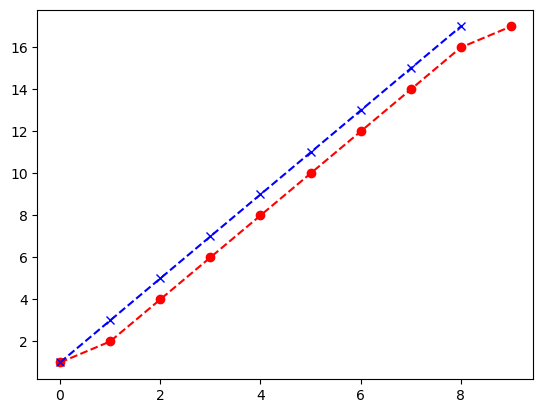

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

y = lambda x: x*x

x1 = np.arange(0,10,1)
x2 = np.arange(0,10,0.1)

y1 = np.gradient(y(x1), 1.)
print(y1)
print(np.diff(y1))

pyplot.plot(x1,np.gradient(y(x1),1.),'r--o');
pyplot.plot(x1[:x1.size-1],np.diff(y(x1))/np.diff(x1),'b--x');
pyplot.show()

### When to use which function?

- Use `np.diff()` when:
  1. You specifically need the forward difference
  2. You're computing differences between consecutive data points (not necessarily derivatives)
  
- Use `np.gradient()` when:
  1. You want derivatives at all points in your array (including endpoints)
  1. You want better accuracy (central differences in the interior)
  1. You're analyzing experimental or simulation data
  
**In most cases, `np.gradient()` is the better choice for numerical differentiation!**

### Beyond 1D: Gradients in Multiple Dimensions

So far we've computed derivatives of functions that depend on a single variable: $f(x)$. But in physics, many quantities depend on multiple variables - for example, temperature $T(x,y,z)$ varies throughout space, or potential energy $U(x,y)$ depends on position in a plane.

When we have a function of multiple variables, $f(x,y)$, the gradient is a vector that points in the direction of steepest increase:

$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$$

This is really just two separate derivatives (called partial derivatives) - one with respect to x and one with respect to y.

#### Physical Examples of Gradients:

1. **Electric Field**: The electric field is the negative gradient of electric potential
   $$\vec{E} = -\nabla V$$
   The field points in the direction where potential decreases most rapidly.

2. **Force from Potential Energy**: Force is the negative gradient of potential energy
   $$\vec{F} = -\nabla U$$
   Objects naturally move "downhill" in potential energy.

3. **Heat Flow**: Heat flows in the direction of the negative temperature gradient
   $$\vec{q} = -k\nabla T$$
   Heat moves from hot to cold regions.

4. **Pressure Gradients**: Drive fluid flow and wind patterns in meteorology
   $$\vec{F} = -\nabla P$$

The good news: `np.gradient()` can compute these multidimensional derivatives automatically!

#### Example: Gradient of a 2D Gaussian

Let's visualize the gradient of a function that looks like a hill: $f(x,y) = e^{-(x^2+y^2)}$

This could represent:
- Temperature distribution around a hot spot
- Concentration of a chemical diffusing from a point source
- Probability density of finding a particle near the origin

In [15]:
# Linear in x
fx = np.array([[1, 2, 3],
               [1, 2, 3],
               [1, 2, 3]])

# Linear in y  
fy = np.array([[1, 1, 1],
               [2, 2, 2],
               [3, 3, 3]])

# Combined - diagonal ramp
f_both = fx + fy
print(f_both)
print("Just x-component:", np.gradient(fx))
print("Just y-component:", np.gradient(fy))
print("Both components:", np.gradient(f_both))

[[2 3 4]
 [3 4 5]
 [4 5 6]]
Just x-component: [array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])]
Just y-component: [array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])]
Both components: [array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])]


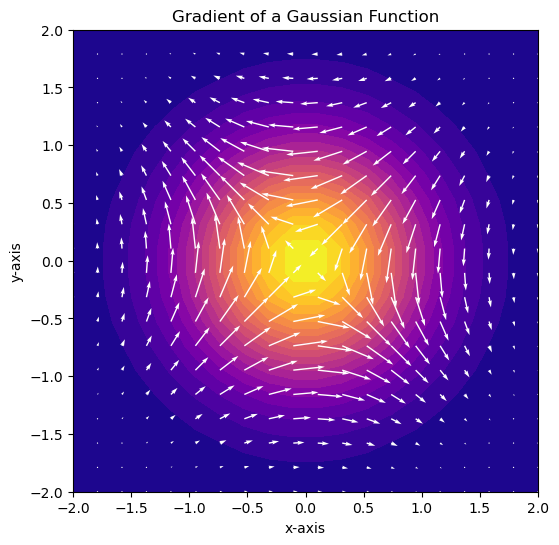

In [16]:
# Define grid size
x = np.linspace(-2, 2, 20)  # 20 points from -2 to 2
y = np.linspace(-2, 2, 20)

# Create meshgrid
X, Y = np.meshgrid(x, y)

# Define function f(x, y) = exp(-x^2 - y^2)
# This is like a "hill" or "hot spot" centered at the origin
F = np.exp(-(X**2 + Y**2))

# Compute numerical gradient
# Computes gradient with respect to x and y
# (Note: first output is df/dy because arrays are indexed [row, column])
dFdx, dFdy = np.gradient(F, x, y) 

# Plot function
fig, ax = plt.subplots(figsize=(6, 6))
# Filled contour plot shows the function value (like a topographic map)
ax.contourf(X, Y, F, levels=20, cmap="plasma")  
# Quiver plot shows gradient vectors (direction of steepest ascent)
# The arrows point "uphill" toward higher values of f
ax.quiver(X, Y, dFdx, dFdy, color='white') 
ax.set_title("Gradient of a Gaussian Function")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

#### The Key Takeaway:

Just like in 1D, `np.gradient()` works in multiple dimensions. You give it a 2D array and the spacing in each direction, and it returns the partial derivatives. This is incredibly useful for analyzing:
- Experimental data on a grid (temperature measurements, pressure readings, etc.)
- Simulation results (fluid flow, electromagnetic fields, etc.)
- Image processing (edge detection uses gradients!)

## Symbolic Differentiation with SymPy

All the methods we've discussed so far are numerical differentiation - they approximate derivatives using finite differences and are subject to truncation and roundoff errors.

But sometimes we don't need an approximation. If we can write our function as a mathematical formula (like $x^2 + 3x + 5$), Python can compute the *exact* derivative symbolically, just like you would do by hand in calculus class!

This is called *symbolic computation*, and Python's `sympy` library handles it beautifully.

### When to use symbolic vs numerical differentiation?

**Use symbolic differentiation (SymPy) when:**
- You have an explicit formula for your function
- You want the exact derivative without any approximation error
- You need to manipulate the derivative algebraically

**Use numerical differentiation when:**
- You only have data points (experimental measurements, simulation output)
- Your function is too complicated for symbolic manipulation
- You're working with large arrays of numbers

Let's see SymPy in action:

In [17]:
import sympy as sp

# Define a symbolic variable (not a number!)
x = sp.symbols('x')

# Define a function symbolically
f = x**2 + 3*x + 5

print("Function f(x) =", f)

# Compute the derivative symbolically
df_dx = sp.diff(f, x)

print("Derivative df/dx =", df_dx)

Function f(x) = x**2 + 3*x + 5
Derivative df/dx = 2*x + 3


Notice that SymPy gives us the exact formula for the derivative: $2x + 3$. No approximation, no error!

But symbolic expressions aren't very useful if we want to evaluate them at specific points. Let's convert the symbolic derivative to a numerical function:

In [18]:
# Convert symbolic expression to a regular Python function
f_numeric = sp.lambdify(x, f)
df_numeric = sp.lambdify(x, df_dx)

# Now we can evaluate at specific points
x_val = 2.0
print(f"At x = {x_val}:")
print(f"  f(x) = {f_numeric(x_val)}")
print(f"  df/dx = {df_numeric(x_val)}")

# Compare to numerical differentiation
h = 0.001
numerical_deriv = (f_numeric(x_val + h) - f_numeric(x_val)) / h
print(f"\nCompare to numerical (forward difference with h={h}):")
print(f"  df/dx ≈ {numerical_deriv}")
print(f"  Error: {abs(numerical_deriv - df_numeric(x_val)):.2e}")

At x = 2.0:
  f(x) = 15.0
  df/dx = 7.0

Compare to numerical (forward difference with h=0.001):
  df/dx ≈ 7.000999999998925
  Error: 1.00e-03


In [19]:
# SymPy handles complicated functions easily
import sympy as sp

x = sp.symbols('x')
g = sp.sin(x) * sp.exp(-x**2)

print("Function g(x) =", g)
print()

# First derivative
dg_dx = sp.diff(g, x)
print("First derivative dg/dx =", dg_dx)
print()

# Second derivative (just for fun!)
d2g_dx2 = sp.diff(g, x, 2)  # the '2' means differentiate twice
print("Second derivative d²g/dx² =", d2g_dx2)

Function g(x) = exp(-x**2)*sin(x)

First derivative dg/dx = -2*x*exp(-x**2)*sin(x) + exp(-x**2)*cos(x)

Second derivative d²g/dx² = (-4*x*cos(x) + 2*(2*x**2 - 1)*sin(x) - sin(x))*exp(-x**2)


---
# Exercise: Analyzing Motion of a Falling Object

In this exercise, you'll analyze position data from a falling object to extract its velocity and acceleration using numerical differentiation.

## Background

A physics student drops a ball from rest and uses a motion sensor to record its position every 0.05 seconds. Due to experimental uncertainties (sensor noise, air resistance, etc.), the measurements aren't perfect. Your job is to:

1. Load the experimental data
2. Calculate the velocity using numerical differentiation
3. Calculate the acceleration from the velocity
4. Compare different differentiation methods
5. Determine if the motion is consistent with free fall (g ≈ 9.8 m/s²)

The data file `falling_ball.txt` contains two columns: time (s) and position (m).

### Questions

1. Load the data from `falling_ball.txt` and plot position vs time. Does the curve look reasonable for a falling object? What shape do you expect?

2. Calculate velocity using the `forward()` and `central()` function from `mydiff.py`. Plot velocity vs time. For free fall from rest, what should the velocity be at t = 0? Does your result match?

3. Calculate acceleration by differentiating the velocity (again using `forward()` and `central()`). Plot acceleration vs time and include a horizontal line at g = -9.8 m/s². Calculate the mean acceleration. Does your measured value agree with g = 9.8 m/s²?

4. Why is the acceleration plot much noisier than the velocity and position plots?

---

In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from mydiff import forward, backward, central

# Load the data
data = np.loadtxt('falling_ball.txt')
time = data[:, 0]
position = data[:, 1]